In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed

# Hexbin plot

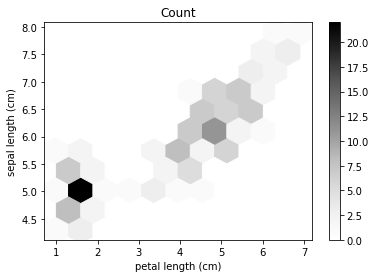

In [101]:
from sklearn.datasets import load_iris
df = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
ax = df.plot.hexbin(x = 'petal length (cm)', y = 'sepal length (cm)', 
                    gridsize= 10,
                    sharex=False,
                    title = 'Count',
                    cmap='Greys')

# Bubble plot

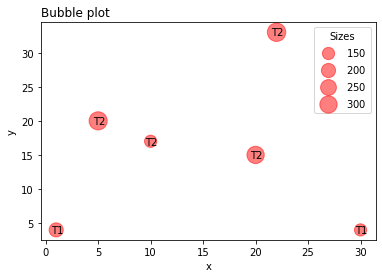

In [102]:
x = np.array([1,10,30,22,5,20])
y = np.array([4,17,4,33,20,15])
z = np.array([20,15,15,34,33,30])*10
t = np.array(["T1", "T2", "T1", "T2", "T2", "T2"])

fig = plt.scatter(x, y,
            s = z,
            c = "red",
            alpha = 0.5)

plt.legend(*fig.legend_elements(prop = "sizes", alpha = 0.5, num = 4, c = "red"),
                                loc="upper right", 
                                title="Sizes")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bubble plot", loc="left")

#plot text
for i, txt in enumerate(t):
    plt.text(x[i]-.5, y[i]-.5, txt)

plt.show()

# Grouped bar chart

In [103]:
year = np.repeat(np.arange(2016,2018),12, axis = None)
month = np.tile(np.arange(1,13),2)
sales = np.random.poisson(15, size = 24)
m = np.array(["Jan", "Feb", "Mar", "Apr","May", "Jun", "Jul","Aug", "Sep", "Oct","Nov", "Dec"])
df = pd.DataFrame({'year':year,
                  'month':month,
                  'sales':sales})

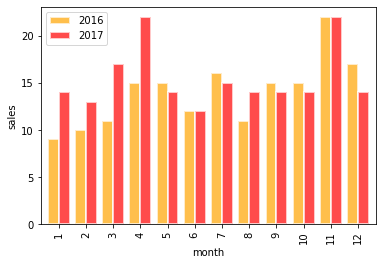

In [104]:
df.pivot(columns='year', index='month', values='sales').plot(kind='bar',
                                                             width=.8, 
                                                             edgecolor='white', 
                                                             color=['orange','red'],
                                                             ylabel= 'sales',
                                                             linewidth=2,
                                                             alpha = 0.7)

plt.legend(loc=0)
plt.show()

# Mosaic Plot

## dataframe as source

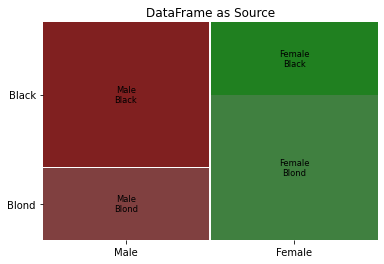

In [149]:
from statsmodels.graphics.mosaicplot import mosaic

Sex = ['Male', 'Male', 'Male', 'Female', 'Female', 'Female']
Hair = ['Blond', 'Black', 'Black', 'Blond', 'Black', 'Blond']
df = pd.DataFrame({'Sex': Sex, 'Hair': Hair})
mosaic(df, ['Sex', 'Hair'], title='DataFrame as Source')
plt.show()

## frequency table as source

In [106]:
# install pydataset
# %pip install pydataset

In [152]:
from pydataset import data
df = pd.DataFrame(data('HairEyeColor'))

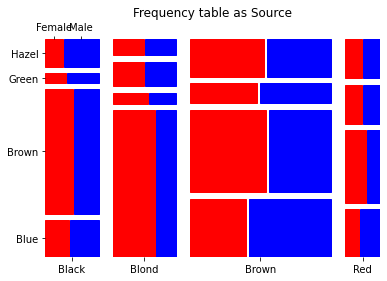

In [155]:
props = lambda key: {'color': 'red' if 'Female' in key else 'blue'} # Choosing colors
mosaic(df.groupby(['Hair', 'Eye', 'Sex']).sum()["Freq"],
       properties = props, 
       axes_label = True,
       labelizer = lambda k: '', # empty labels
       gap = 0.05,
       title='Frequency table as Source')
plt.box(False) # removing chart frame
plt.show()